# Census Income Data Set



Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data=pd.read_csv('CensusIncome.csv')

In [3]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,49,State-gov,102308,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,42,United-States,>50K
10536,19,Private,84747,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,24,United-States,<=50K
10537,20,Private,197752,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
10538,66,Private,185336,HS-grad,9,Widowed,Sales,Other-relative,White,Female,0,0,35,United-States,<=50K


In [4]:
data.shape

(10540, 15)

# Null Value Analysis

In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            1
dtype: int64

There is one null value present in Income .

Replacing the null value with mode as Income is a categorical class


In [6]:
data['Income'].fillna(data['Income'].mode().values[0],inplace=True)

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

# Encoding

There are no null/missing values in the data

Income has two values  <=50K , >50k.

Creating a function below which will encode  <=50K =0 and >50k =1 

In [8]:
def partition(x):
    if x ==' <=50K':
        return 0
    return 1
actualScore = data['Income']
ZeroOne = actualScore.map(partition) 
data['Income'] = ZeroOne
print("Number of data points in our data", data.shape)
data.head(200)

Number of data points in our data (10540, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,0
196,36,Private,99374,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,1
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,1


# Familiarisation with the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10540 entries, 0 to 10539
Data columns (total 15 columns):
age               10540 non-null int64
workclass         10540 non-null object
fnlwgt            10540 non-null int64
education         10540 non-null object
education-num     10540 non-null int64
marital-status    10540 non-null object
occupation        10540 non-null object
relationship      10540 non-null object
race              10540 non-null object
sex               10540 non-null object
capital-gain      10540 non-null int64
capital-loss      10540 non-null int64
hours-per-week    10540 non-null int64
native-country    10540 non-null object
Income            10540 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [10]:
data.Income.value_counts()

0    8036
1    2504
Name: Income, dtype: int64

This dataset has 2504 rows that belongs to 1 and 8036 rows which belongs to 0 Class

# Replacing 0 with mean

In [11]:
data['capital-gain']=data['capital-gain'].mask(data['capital-gain']==0,data['capital-gain'].mean())
data['capital-loss']=data['capital-loss'].mask(data['capital-loss']==0,data['capital-loss'].mean())

It was observed that capital-loss had lots of zero values , therefore zero values have been replaced with mean of the feature.

# Conversion of Non-Numeric values to Numeric Vectors

In [12]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [13]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174.000000,87.031879,40,38,0
1,50,6,83311,9,13,2,4,0,4,1,1040.494782,87.031879,13,38,0
2,38,4,215646,11,9,0,6,1,4,1,1040.494782,87.031879,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,1040.494782,87.031879,40,38,0
4,28,4,338409,9,13,2,10,5,2,0,1040.494782,87.031879,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,49,7,102308,9,13,2,10,0,4,1,1040.494782,87.031879,42,38,1
10536,19,4,84747,11,9,4,12,3,4,0,1040.494782,87.031879,24,38,0
10537,20,4,197752,15,10,4,3,4,4,1,1040.494782,87.031879,40,38,0
10538,66,4,185336,11,9,6,12,2,4,0,1040.494782,87.031879,35,38,0


In [14]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,10540.000000,10540.000000,1.054000e+04,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000
mean,38.422581,3.876565,1.908008e+05,10.356167,10.074858,2.611765,6.613662,1.452657,3.670493,0.671442,1995.696633,169.976397,40.520114,35.715370,0.237571
std,13.602743,1.462710,1.057812e+05,3.864619,2.549630,1.506457,4.258923,1.606733,0.845646,0.469711,7037.893901,381.095036,12.335186,7.714249,0.425615
min,17.000000,0.000000,1.930200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000,87.031879,1.000000,0.000000,0.000000
25%,27.000000,4.000000,1.187968e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,1040.494782,87.031879,40.000000,38.000000,0.000000
50%,37.000000,4.000000,1.794450e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,1040.494782,87.031879,40.000000,38.000000,0.000000
75%,47.000000,4.000000,2.391085e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,1040.494782,87.031879,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.226583e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# Standard Scaling of the Dataset

In [15]:
y=data['Income']
y=pd.DataFrame(y)
x=data.drop(['Income'],axis=1)
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174.000000,87.031879,40,38
1,50,6,83311,9,13,2,4,0,4,1,1040.494782,87.031879,13,38
2,38,4,215646,11,9,0,6,1,4,1,1040.494782,87.031879,40,38
3,53,4,234721,1,7,2,6,0,2,1,1040.494782,87.031879,40,38
4,28,4,338409,9,13,2,10,5,2,0,1040.494782,87.031879,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,49,7,102308,9,13,2,10,0,4,1,1040.494782,87.031879,42,38
10536,19,4,84747,11,9,4,12,3,4,0,1040.494782,87.031879,24,38
10537,20,4,197752,15,10,4,3,4,4,1,1040.494782,87.031879,40,38
10538,66,4,185336,11,9,6,12,2,4,0,1040.494782,87.031879,35,38


In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [17]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.042451,2.135476,-1.070986,-0.350935,1.147336,0.921567,-1.318157,-0.281738,0.389669,0.699522,0.025336,-0.217658,-0.042167,0.296171
1,0.851150,1.451781,-1.016200,-0.350935,1.147336,-0.406114,-0.613720,-0.904149,0.389669,0.699522,-0.135729,-0.217658,-2.231131,0.296171
2,-0.031067,0.084392,0.234885,0.166605,-0.421594,-1.733796,-0.144095,-0.281738,0.389669,0.699522,-0.135729,-0.217658,-0.042167,0.296171
3,1.071704,0.084392,0.415219,-2.421095,-1.206059,-0.406114,-0.144095,-0.904149,-1.975498,0.699522,-0.135729,-0.217658,-0.042167,0.296171
4,-0.766248,0.084392,1.395477,-0.350935,1.147336,-0.406114,0.795154,2.207904,-1.975498,-1.429547,-0.135729,-0.217658,-0.042167,-3.981830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,0.777631,2.135476,-0.836604,-0.350935,1.147336,-0.406114,0.795154,-0.904149,0.389669,0.699522,-0.135729,-0.217658,0.119978,0.296171
10536,-1.427911,0.084392,-1.002625,0.166605,-0.421594,0.921567,1.264778,0.963083,0.389669,-1.429547,-0.135729,-0.217658,-1.339331,0.296171
10537,-1.354393,0.084392,0.065716,1.201685,-0.029362,0.921567,-0.848532,1.585494,0.389669,0.699522,-0.135729,-0.217658,-0.042167,0.296171
10538,2.027439,0.084392,-0.051664,0.166605,-0.421594,2.249248,1.264778,0.340672,0.389669,-1.429547,-0.135729,-0.217658,-0.447531,0.296171


Merging input and output dataframes after scaling

In [18]:
df_final = pd.concat([x, y], axis=1, sort=False)

In [19]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Income
0,0.042451,2.135476,-1.070986,-0.350935,1.147336,0.921567,-1.318157,-0.281738,0.389669,0.699522,0.025336,-0.217658,-0.042167,0.296171,0
1,0.851150,1.451781,-1.016200,-0.350935,1.147336,-0.406114,-0.613720,-0.904149,0.389669,0.699522,-0.135729,-0.217658,-2.231131,0.296171,0
2,-0.031067,0.084392,0.234885,0.166605,-0.421594,-1.733796,-0.144095,-0.281738,0.389669,0.699522,-0.135729,-0.217658,-0.042167,0.296171,0
3,1.071704,0.084392,0.415219,-2.421095,-1.206059,-0.406114,-0.144095,-0.904149,-1.975498,0.699522,-0.135729,-0.217658,-0.042167,0.296171,0
4,-0.766248,0.084392,1.395477,-0.350935,1.147336,-0.406114,0.795154,2.207904,-1.975498,-1.429547,-0.135729,-0.217658,-0.042167,-3.981830,0


In [20]:
df_final.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 'Income'], dtype='object')

Renaming the columns with original names after scaling

In [21]:
df_final.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']

In [22]:
df_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.042451,2.135476,-1.070986,-0.350935,1.147336,0.921567,-1.318157,-0.281738,0.389669,0.699522,0.025336,-0.217658,-0.042167,0.296171,0
1,0.851150,1.451781,-1.016200,-0.350935,1.147336,-0.406114,-0.613720,-0.904149,0.389669,0.699522,-0.135729,-0.217658,-2.231131,0.296171,0
2,-0.031067,0.084392,0.234885,0.166605,-0.421594,-1.733796,-0.144095,-0.281738,0.389669,0.699522,-0.135729,-0.217658,-0.042167,0.296171,0
3,1.071704,0.084392,0.415219,-2.421095,-1.206059,-0.406114,-0.144095,-0.904149,-1.975498,0.699522,-0.135729,-0.217658,-0.042167,0.296171,0
4,-0.766248,0.084392,1.395477,-0.350935,1.147336,-0.406114,0.795154,2.207904,-1.975498,-1.429547,-0.135729,-0.217658,-0.042167,-3.981830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,0.777631,2.135476,-0.836604,-0.350935,1.147336,-0.406114,0.795154,-0.904149,0.389669,0.699522,-0.135729,-0.217658,0.119978,0.296171,1
10536,-1.427911,0.084392,-1.002625,0.166605,-0.421594,0.921567,1.264778,0.963083,0.389669,-1.429547,-0.135729,-0.217658,-1.339331,0.296171,0
10537,-1.354393,0.084392,0.065716,1.201685,-0.029362,0.921567,-0.848532,1.585494,0.389669,0.699522,-0.135729,-0.217658,-0.042167,0.296171,0
10538,2.027439,0.084392,-0.051664,0.166605,-0.421594,2.249248,1.264778,0.340672,0.389669,-1.429547,-0.135729,-0.217658,-0.447531,0.296171,0


# CorRelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

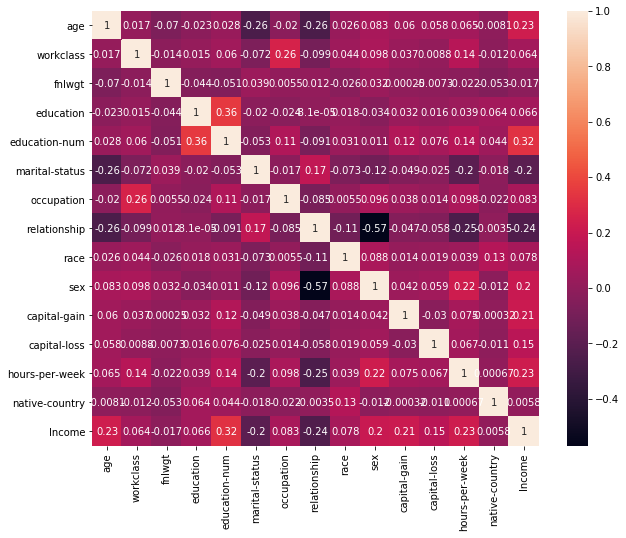

In [23]:
plt.figure(figsize=(10,8))
df_cor=df_final.corr()
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix

From the below code I have removed the features which are having correlation of more than 0.5. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [24]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [25]:
data.shape

(10540, 15)

By looking into the shape after performing feature selection using CorRelation ,we find the the features are not very very high corRelated , that's why the shape is not changed for the new data

# UniVariate Analysis

# 1.BoxPlot
The Box plot will help us to identify the outliers in the dataset, if our dataset has significant outliers then those will treated with the help of several techniques.

Lets Check for the outliers!

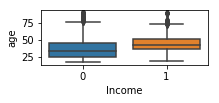

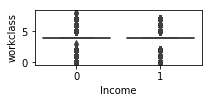

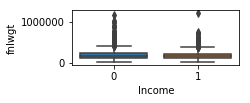

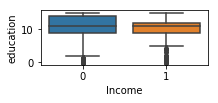

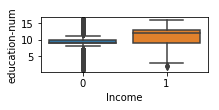

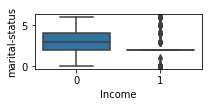

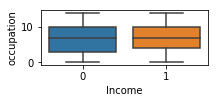

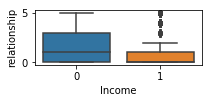

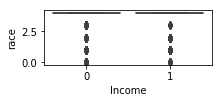

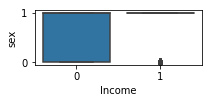

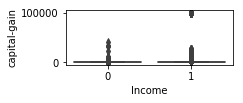

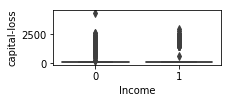

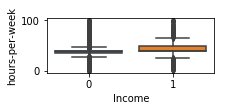

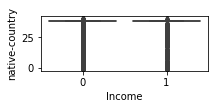

In [26]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
    plt.figure(figsize=(3,1))
    sns.boxplot(x='Income',y=val,data=data)
    plt.show()

# 2.Distribution plot.
This plot will display the distribution of the features and will let us know skewness of the dependent variables

<Figure size 360x144 with 0 Axes>

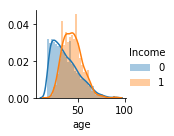

<Figure size 360x144 with 0 Axes>

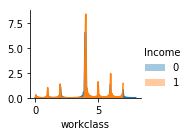

<Figure size 360x144 with 0 Axes>

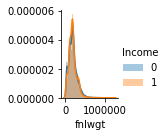

<Figure size 360x144 with 0 Axes>

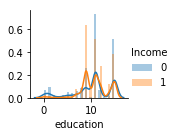

<Figure size 360x144 with 0 Axes>

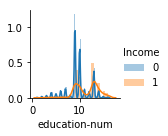

<Figure size 360x144 with 0 Axes>

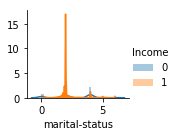

<Figure size 360x144 with 0 Axes>

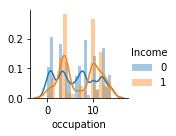

<Figure size 360x144 with 0 Axes>

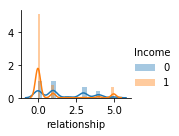

<Figure size 360x144 with 0 Axes>

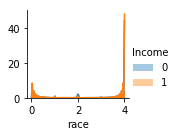

<Figure size 360x144 with 0 Axes>

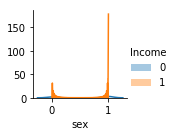

<Figure size 360x144 with 0 Axes>

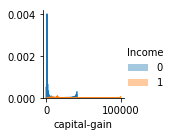

<Figure size 360x144 with 0 Axes>

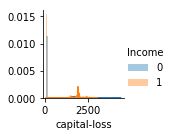

<Figure size 360x144 with 0 Axes>

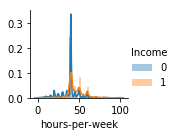

<Figure size 360x144 with 0 Axes>

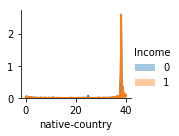

In [27]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
    plt.figure(figsize=(5,2))
    sns.FacetGrid(data,hue="Income",size=2)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

From the above curves it can be seen that some features are skewed, the removal of the skewness is important part so to have normalised distribution for the fetaures. The skewness will be treated below

# BiVariate Analysis

# 1.BarPlot

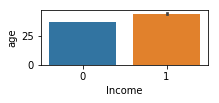

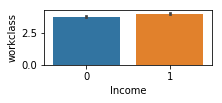

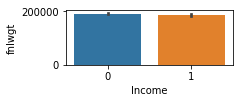

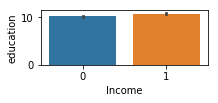

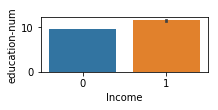

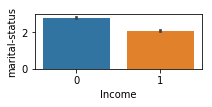

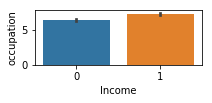

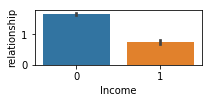

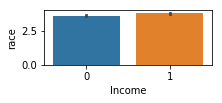

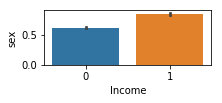

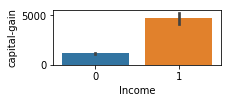

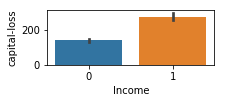

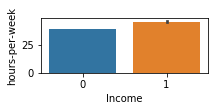

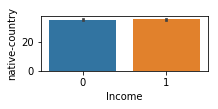

In [28]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
    plt.figure(figsize=(3,1))
    sns.barplot(x='Income',y=val,data=data)
    plt.show()

male , more educated and umnarried are showing high incomes from the above barPlots

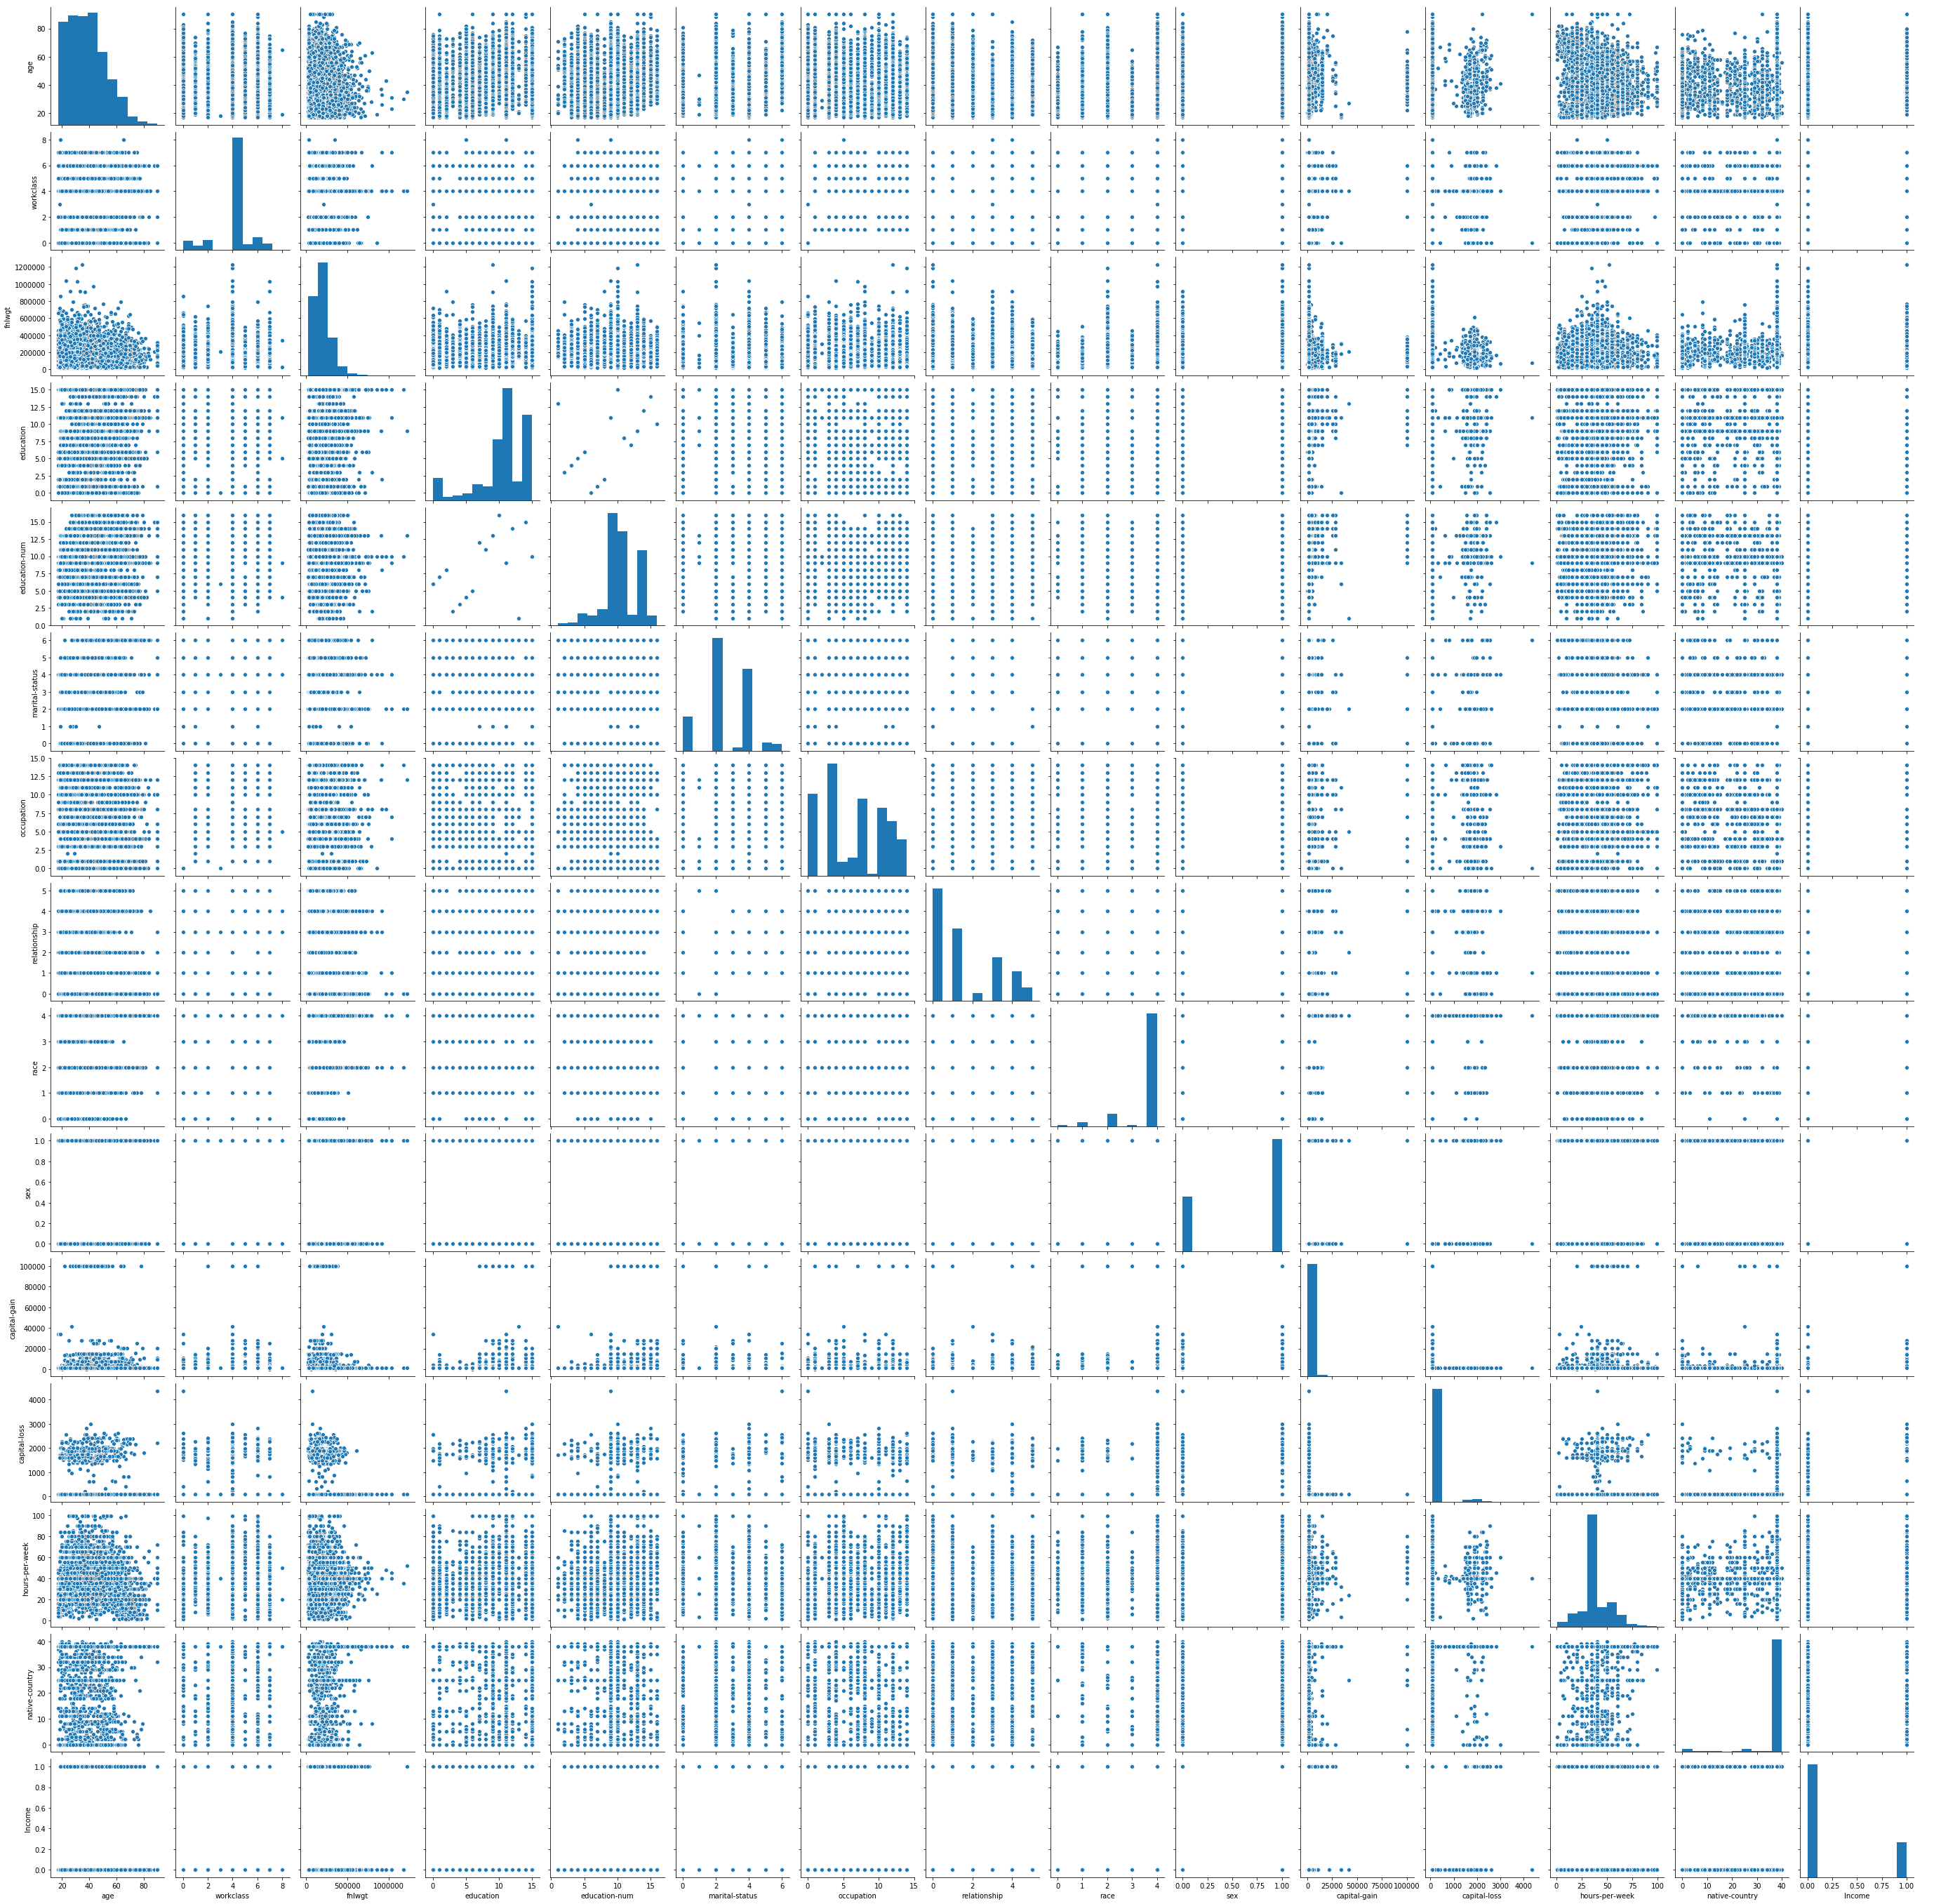

In [29]:
sns.pairplot(data)

# Treatment of Outliers

In [30]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.04245076, 2.1354762 , 1.07098598, ..., 0.04216706, 0.29617119,
        0.55820947],
       [0.85114955, 1.45178132, 1.01620048, ..., 2.23113124, 0.29617119,
        0.55820947],
       [0.03106731, 0.08439156, 0.2348849 , ..., 0.04216706, 0.29617119,
        0.55820947],
       ...,
       [1.35439262, 0.08439156, 0.06571634, ..., 0.04216706, 0.29617119,
        0.55820947],
       [2.02743871, 0.08439156, 0.05166362, ..., 0.4475308 , 0.29617119,
        0.55820947],
       [1.20735647, 2.65038796, 0.9376709 , ..., 1.25825827, 0.29617119,
        0.55820947]])

In [31]:
df=data[(zs<3).all(axis=1)]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174.000000,87.031879,40,38,0
1,50,6,83311,9,13,2,4,0,4,1,1040.494782,87.031879,13,38,0
2,38,4,215646,11,9,0,6,1,4,1,1040.494782,87.031879,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,1040.494782,87.031879,40,38,0
5,37,4,284582,12,14,2,4,5,4,0,1040.494782,87.031879,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,49,7,102308,9,13,2,10,0,4,1,1040.494782,87.031879,42,38,1
10536,19,4,84747,11,9,4,12,3,4,0,1040.494782,87.031879,24,38,0
10537,20,4,197752,15,10,4,3,4,4,1,1040.494782,87.031879,40,38,0
10538,66,4,185336,11,9,6,12,2,4,0,1040.494782,87.031879,35,38,0


In [32]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (10540, 15)
shape of the data without  outliers   (8883, 15)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is 8883* 15 . Now this will be our finalised Dataset for modelling.

# Separation of Input and Output Variable

In [33]:
x=df_final.iloc[:,:-2]
y=df_final.iloc[:,-1]

# Applying Various Classification Models

In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [35]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Function for Auc Score and Confusion Matrix
This function will result in auc score for model and also print the confusion matrix

In [36]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [37]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [38]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

# 1.DecisionTreeClassifier

In [39]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 8}

The maximum accuracy reached is 0.8655913978494624 at random state 42
Cross_val_score  0.847438330170778


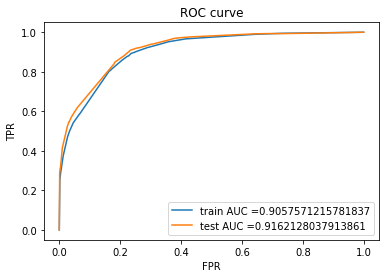

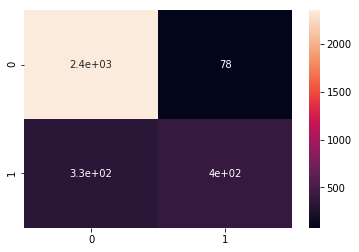

In [40]:
DT=DecisionTreeClassifier(max_depth=8)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)


In [41]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.KNeighborsClassifier

In [42]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 24}

The maximum accuracy reached is 0.8387096774193549 at random state 42
Cross_val_score  0.8273244781783682


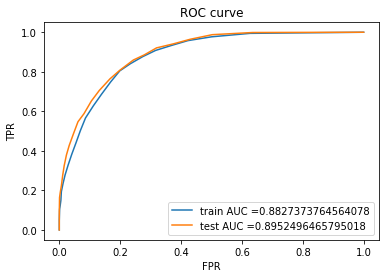

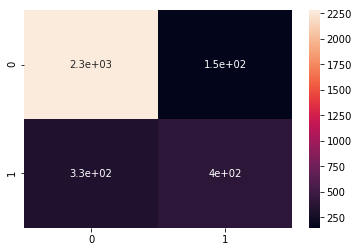

In [43]:
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier(n_neighbors=24,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)


In [44]:
Max_accuracy=highest_accuracy(Knn,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Naive Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 29}

The maximum accuracy reached is 0.8209993674889311 at random state 87
Cross_val_score  0.8031309297912713


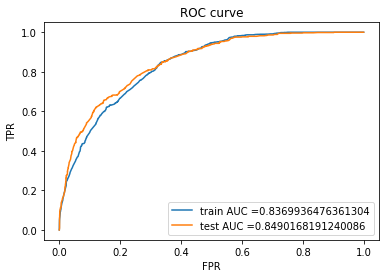

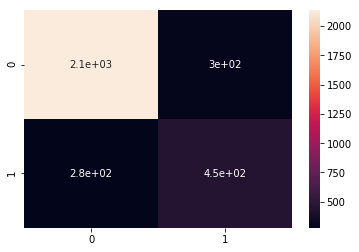

In [46]:
NB=BernoulliNB(alpha=29)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)


In [47]:
Max_accuracy=highest_accuracy(NB,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Logistic Regression

In [48]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1, 'penalty': 'l2'}

The maximum accuracy reached is 0.8339658444022771 at random state 42
Cross_val_score  0.8234345351043644


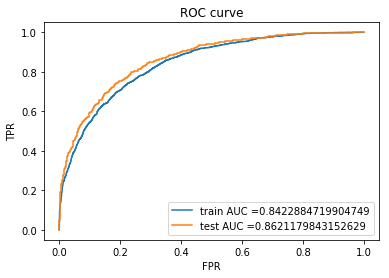

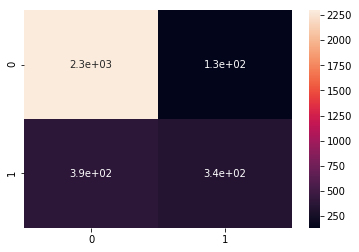

In [49]:
log=LogisticRegression(C=1,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)


In [50]:
Max_accuracy=highest_accuracy(log,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Appying ensemble model for better results

# 1.RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30),}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 13, 'n_estimators': 48}

The maximum accuracy reached is 0.8649588867805187 at random state 42
Cross_val_score  0.857685009487666


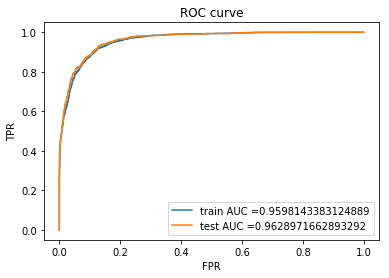

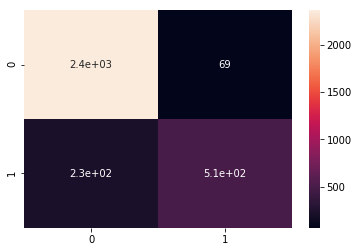

In [52]:
RF=RandomForestClassifier(n_estimators=48,max_depth=13)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)


In [53]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.BaggingClassifier

In [55]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,Knn,DT]}
BG=BaggingClassifier()
gs=GridSearchCV(BG,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=8, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 18}

The maximum accuracy reached is 0.8640101201771031 at random state 42
Cross_val_score  0.8529411764705882


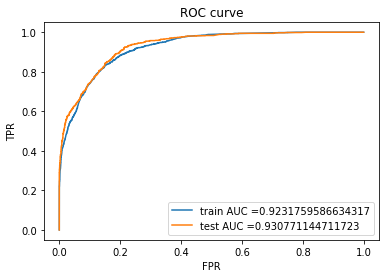

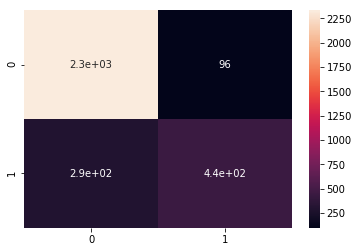

In [56]:
BG=BaggingClassifier(n_estimators=18,base_estimator=DT)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)


# Plotting Bargraph to Analyse the Performance Matrix

In [57]:
Max_accuracy=highest_accuracy(BG,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

In [58]:
model =['DT','KNN','NB','LOG','RF','BAGGING']

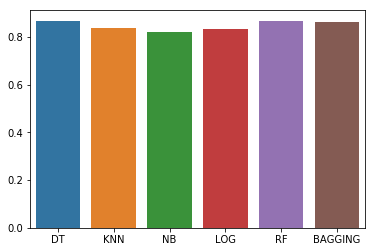

In [59]:
sns.barplot(x=model,y=List_acc)

from the above barplot --> RandomForestClassifier has highest accuracy

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that RandomForestClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.8649588867805187 at random state  42

Therefore RandomForestClassifier is selected as our final model

# Final Model --- RandomForestClassifier

Accuracy 0.8712839974699558
--------------------------------------


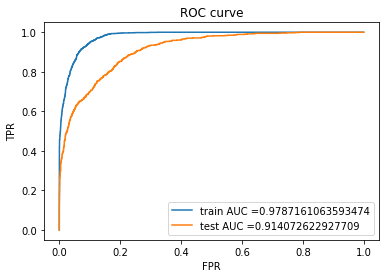

-----------------Confusion Matrix---------------------


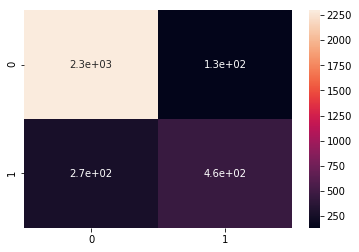

In [60]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)
RF=RandomForestClassifier(n_estimators=48,max_depth=13)
RF.fit(train_x,train_y)
pred = RF.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(RF,42)
print('-----------------Confusion Matrix---------------------')


In [61]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2429
           1       0.78      0.63      0.69       733

    accuracy                           0.87      3162
   macro avg       0.83      0.79      0.81      3162
weighted avg       0.87      0.87      0.87      3162



In [63]:
print('mean cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.8578747628083491
std deviation of cross_val_score 0.006821889188708755


In [64]:
from sklearn.externals import joblib
joblib.dump(RF,"RF_Income.pkl")

['RF_Income.pkl']

# Conclusion:-

In this project we have found that this is dataset is classification driven dataset as output class is binary , i.e >50k and <=50k which was mapped to 1 and 0 respectively .This data deals with the income of the people which is either > 50 k or less than 50 k .The income is decided by several other features which we graphically seen in the initial segmnt of the project.

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis and several EDA techniques.

We have also treated the outliers using zscore < 3. 

Several classification algorithms have been performed and by looking into performance matrix RandomForestClassifier is selected as final model which is best performing with this dataset.

At last we have saved the model